# Primera ronda de ejercicios

## Ejercicio 1.2

Suponga que utilizamos un perceptrón para detectar mensajes de spam. Digamos que cada mensaje de correo se representa por una frecuencia de ocurrencia de palabras clave y que la salida es $+1$ si el mensaje se considera spam.

1.   ¿Puedes pensar en algunas palabras claves que tendrán un peso cuyo valor sea grande (positivamente) en el perceptrón?

**Solución.**

Estas palabras claves deben ser palabras cuya presencia en un correo sea un buen indicador de que el correo es en efecto spam, ejemplos serían:

1.   Promoción / Oferta
2.   Gratis / Regalo / Barato / Lotería / Ganador
3.   Click / Ingresa / Suscríbete
4.   Urgente / Ayuda

entre otras.

2.   ¿Qué hay acerca de las palabras clave que obtendrán un peso negativo?

**Solución.**

Éstas son palabras que de estar presentes en el correo disminuirían las posibilidades de que el mensaje fuera spam, considere por ejemplo palabras coloquiales cuyo uso se dé en conversaciones informales que uno tiene con personas cercanas y por lo cual sería muy difícil que estén presentes en mensajes de spam.

3.   ¿Qué parámetro en el perceptrón afecta directamente cuántos mensajes terminan siendo clasificados como spam?

**Solución.**

Este parámetro es el bias $b$ pues un mensaje es clasificado como spam si y sólo si la suma pesada de sus características pasa el umbral $b$, es decir que $x = (x_1,\dots,x_d)$ es clasificado como spam si y sólo si

$$\sum_{i=1}^d w_ix_i + b > 0 \Leftrightarrow \sum_{i=1}^d w_ix_i > -b$$

## Ejercicio 1.3

La regla de actualización $w(t+1) = w(t) + y(t)x(t)$ tiene la buena interpretación de que se mueve en la dirección de clasificar x(t) correctamente.

1.   Muestre que $y(t)w^T(t)x(t) < 0$.

**Solución.**

Note que la predicción que hace el perceptrón en la iteración $t$-ésima está dada por $sign(w^T(t) x(t))$ y como estamos asumiendo que $x(t)$ está clasificado incorrectamente, debemos tener que $sign(w^T(t) x(t)) \neq y(t)$ y por tanto $y(t) \cdot w(t) x(t) < 0$.

2.   Muestre que $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$

**Solución.**

$$
\begin{align*}
y(t)w^T(t+1)x(t) &=  y(t)(w(t) + y(t)x(t)) x(t) \\
&= y(t)w^T(t)x(t) + (y(t))^2x^T(t) x(t) \\
&= y(t)w^T(t)x(t) + x^T(t) x(t) \\
& >  y(t)w^T(t)x(t)
\end{align*}
$$

donde la última parte se tiene porque $x^T(t) x(t)> 0$.

3.   En lo que concierne a la clasificación de $x(t)$, argumente que el movimiento de $w(t)$ a $w(t+1)$ es un movimiento en la dirección correcta. 

**Solución.**

Dado que $x(t)$ está mal clasificado, tenemos que $sign(w^T(t)x(t)) \neq sign(y(t))$ o dicho de otra manera $y(t) \cdot w^T(t)x(t) < 0$, no obstante, para clasificar correctamente a $x(t)$ necesitamos que $sign(w^T(t)x(t)) = sign(y(t))$ o dicho de otra manera que $y(t) \cdot w^T(t)x(t) > 0$ y aunque al utilizar la regla de actualización no podemos garantizar esto, sí podemos garantizar que $y(t) \cdot w^T(t+1)x(t)$ es menos negativo que $y(t) \cdot w^T(t)x(t)$, es decir que éste es un movimiento en la dirección correcta.

## Ejercicio 1.10

A continuación, se muestra un experimento que ilustra la diferencia entre un solo recipiente y varios recipientes. Ejecute una simulación por computador para lanzar $1000$ monedas justas. Lanza cada moneda de forma independiente $10$ veces. Centrémonos en $3$ monedas de la siguiente manera:
$ c_ {1} $ es la primera moneda lanzada; $c_{\text{rand}}$ es una moneda que eliges al azar; $c_{\min} $ es la moneda que tuvo la frecuencia mínima de caras (elija la primera en caso de empate). Sea $ \nu_{1}, \nu_{\text{rand}} $ y $ \nu_{\min} $ la fracción de caras que obtenga por las tres monedas respectivas.

**Solución**


In [ ]:
import numpy as np
from IPython.display import clear_output

#Para nosotros cara es 1 y sello es 0

def lanzar_monedas(n,m):
  #Esta función lanza n monedas, cada una m veces
  return np.random.choice([0,1], size = (n,m))

def obtener_monedas_importantes(monedas):
  #Esta función retorna c_1, c_rand y c_min
  c1 = monedas[1,:]

  n_fila_aleatoria = np.random.choice(monedas.shape[0], size = 1)
  c_rand = monedas[n_fila_aleatoria][0]

  n_caras = np.apply_along_axis(lambda x: np.linalg.norm(x, ord = 0), 1, monedas)
  indice_min = np.where(n_caras == np.amin(n_caras))[0][0]
  c_min = monedas[indice_min,:]

  indices_monedas_importantes = [1,n_fila_aleatoria[0],indice_min]
  return (c1, c_rand, c_min), indices_monedas_importantes

def obtener_frecuencias_importantes(monedas_importantes):
  #Esta función retorna v_1, v_rand y v_min
  return [np.linalg.norm(moneda_importante, ord = 0)/10 for moneda_importante in monedas_importantes]

def ejecutar_experimento(n = 1000, m = 10, imprimir = True):
  #Esta función ejecuta un experimento
  monedas = lanzar_monedas(n,m)
  monedas_importantes, indices_monedas_importantes = obtener_monedas_importantes(monedas)
  frecuencias_importantes = obtener_frecuencias_importantes(monedas_importantes)

  if imprimir:
    print("----------------------------------")
    print("Experimento ejecutado exitosamente")
    print("----------------------------------")
    print("c_rand: Moneda #", indices_monedas_importantes[1])
    print("c_min: Moneda #", indices_monedas_importantes[2])
    print("----------------------------------")
    print("v_1 = ", frecuencias_importantes[0])
    print("v_rand = ", frecuencias_importantes[1])
    print("v_min = ", frecuencias_importantes[2])
    print("----------------------------------")

  return indices_monedas_importantes, frecuencias_importantes
ejecutar_experimento()

----------------------------------
Experimento ejecutado exitosamente
----------------------------------
c_rand: Moneda # 882
c_min: Moneda # 171
----------------------------------
v_1 =  0.5
v_rand =  0.3
v_min =  0.1
----------------------------------


([1, 882, 171], [0.5, 0.3, 0.1])

*   a) ¿Cuál es el valor de $\mu$ para las $3$ monedas seleccionadas?

**Solución**

De acuerdo al experimento descrito, se tiene que $\mu$ es la probabilidad de que al tirar una moneda caiga cara, y como es una moneda justa se tiene que $\mu = \frac{1}{2}$ en cualquier caso.

*   b) Repita todo este experimento una gran cantidad de veces (p. Ej. $100.000$ ejecuciones de todo el experimento) para obtener varias instancias de $\nu_{1},\nu_{\text{rand}}$ y $\nu_{\min} $ y grafique los histogramas de las distribuciones de $\nu_{1}, \nu_{\text{rand}}$ y $ \nu_{\min}$. Identifique que las monedas que terminan siendo $c_{\text{rand}}$ y $c_{\text{min}}$ pueden diferir de una ejecución a otra.

**Solución**

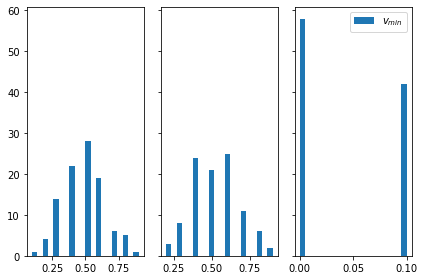

In [ ]:
import matplotlib.pyplot as plt

total_experimentos = 100

def repetir_experimento(k = 100_000):
  #Esta función repite el experimento k veces
  indices_finales = []
  frecuencias_finales = []
  
  for i in range(k):
    indices_monedas_importantes, frecuencias_importantes = ejecutar_experimento(imprimir = False)
    indices_finales.append(indices_monedas_importantes)
    frecuencias_finales.append(frecuencias_importantes)

  return indices_finales, frecuencias_finales

def graficar_frecuencias(frecuencias_finales):
  #Esta función gafica las frecuencias del número de caras de las 3 monedas importantes

  frecuencias_finales = np.array(frecuencias_finales).transpose()

  n_bins = 20
  fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

  # We can set the number of bins with the `bins` kwarg
  axs[0].hist(frecuencias_finales[0,:], label = "$v_0$", bins=n_bins)
  axs[1].hist(frecuencias_finales[1,:], label = "$v_{rand}$", bins=n_bins)
  axs[2].hist(frecuencias_finales[2,:], label = "$v_{min}$", bins=n_bins)

  plt.legend()

indices_finales, frecuencias_finales = repetir_experimento(k = total_experimentos)
graficar_frecuencias(frecuencias_finales)

Estas son las distribuciones de $v_1, v_{rand}$ y $v_{min}$.

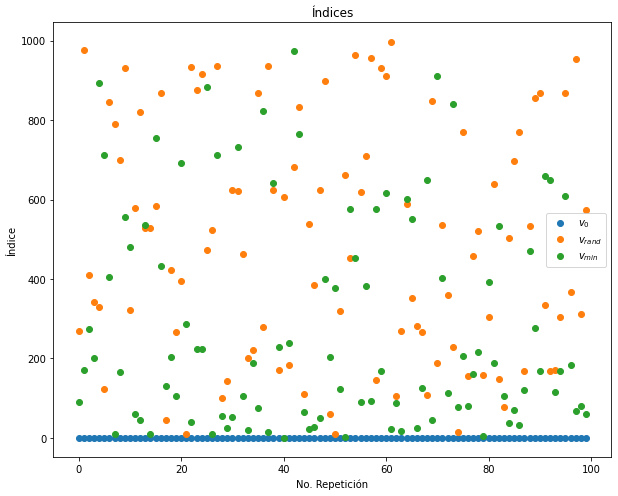

In [ ]:
def graficar_indices(indices_finales):
  #Esta función gafica los índices de las 3 monedas importantes 
  n = len(indices_finales)
  indices_finales = np.array(indices_finales).transpose()
  fig = plt.figure(figsize =(10, 8))
  plt.scatter(range(n), indices_finales[0,:], label = "$v_0$")
  plt.scatter(range(n), indices_finales[1,:], label = "$v_{rand}$")
  plt.scatter(range(n), indices_finales[2,:], label = "$v_{min}$")
  plt.title("Índices")
  plt.xlabel("No. Repetición")
  plt.ylabel("Índice")
  plt.legend()
  plt.show()

graficar_indices(indices_finales)

Acá podemos apreciar que en efecto las monedas que terminan siendo $c_{rand}$ y $c_{min}$ pueden diferir en cada iteración.

*   c) Usando (b), grafique estimaciones para $\mathbb{P}[|\nu-\mu|>\epsilon]$ como una función de $\epsilon$, junto con el límite de Hoeffding $2e^{-2\epsilon^{2}N}$ (en el mismo gráfico).



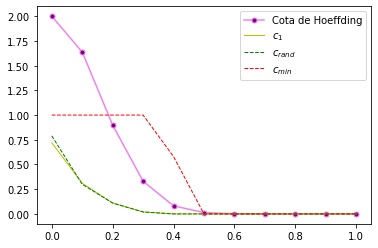

In [ ]:
def cota_hoeffding(epsilon, total_lanzamientos = 10):
  #Esta función calcula la cota de Hoeffding dados epsilon, N
  return 2.0*np.exp(-2.0*total_lanzamientos*epsilon**2)

def estimar_probabilidades(frecuencias_finales):
  #Esta función estima P[|\nu-\mu| > epsilon] para c_1, c_rand, c_min
  frecuencias_finales = np.array(frecuencias_finales).transpose()

  pv_i = []
  epsilons = np.linspace(0,1,11)
  cotas = [cota_hoeffding(epsilon) for epsilon in epsilons]
  for epsilon in epsilons:
    pv_1 = np.sum(np.abs(frecuencias_finales[0,:] - 0.5) >  epsilon) / total_experimentos
    pv_rand = np.sum(np.abs(frecuencias_finales[1,:] - 0.5) >  epsilon) / total_experimentos
    pv_min = np.sum(np.abs(frecuencias_finales[2,:] - 0.5) >  epsilon) / total_experimentos
    pv_i.append([pv_1,pv_rand,pv_min])

  return np.array(pv_i).transpose(), epsilons, cotas

def graficar_probabilidades(probabilidades, epsilons, cotas):
  #Esta función grafica las estimaciones de las probabilidades así como la cota de Hoeffding
  plt.plot(epsilons, cotas, marker='o', markerfacecolor='purple', markersize=5, color='violet', label='Cota de Hoeffding')
  plt.plot(epsilons, probabilidades[0,:], marker='', color='y', linewidth=1, label='$c_1$')
  plt.plot(epsilons, probabilidades[1,:], marker='', color='g', linewidth=1, linestyle='dashed', label='$c_{rand}$')
  plt.plot(epsilons, probabilidades[2,:], marker='', color='r', linewidth=1, linestyle='dashed', label='$c_{min}$')
  plt.legend()


probabilidades, epsilons, cotas = estimar_probabilidades(frecuencias_finales)
graficar_probabilidades(probabilidades, epsilons, cotas)

*   d) ¿Cuáles monedas obedecen la cota de Hoeffding y cuál no? Explique por qué.

**Solución**

Las monedas $c_1$ y $c_{rand}$ obedecen la cota de Hoeffding pues fueron elegidas antes de ejecutar el experimento, no obstante $c_{min}$ no obedece la cota pues para calcular cuál moneda es $c_{min}$ hay que llevar a cabo el expermiento.



*   e) Relacione la parte (d) a los múltiples recipientes en la figura 1.10.

**Solución**

Dada una realización del experimento, podemos asociar a cada una de las $1000$ monedas un recipiente vacío. Al tirar una moneda en específico, tomaremos una bola y la pintaremos de verde si el resultado fue cara o rojo en otro caso, entonces la proporción de bolas verdes en el recipiente $i$-ésimo está dada por $\nu_i = \mathbb{E}_{in}(h_i)$ y $\mu = \mathbb{E}_{out}(h_i) = \frac{1}{2} $ para todos los casos. Note que para el recipiente asociado a $c_1$ y $c_{rand}$ no es necesario elegir $D$ de antemano, es decir que cumplen con las hipótesis de la desigualdad de Hoeffding como mostró el numeral d), sin embargo, para encontrar el recipiente asociado a $c_{min}$ es necesario primero generar el conjunto de datos $D$ lo cual hace que la desigualdad de Hoeffding no se cumpla.




## Ejercicio 1.11

Se nos da un conjunto de datos $\mathcal{D}$ de $25$ ejemplos de entrenamiento de una función objetivo desconocida $f:\mathcal{X}\rightarrow\mathcal{Y}$, donde $\mathcal{X} = \mathbb{R}$ y $\mathcal{Y} = \{- 1, + 1 \} $. Para aprender $f$, usamos un conjunto de hipótesis simple $\mathcal{H} = \left \{h_{1}, h_{2} \right \}$ donde $h_{1}$ es la función constante $+1$ y $h_{2} $ es la función constante $-1$.

Consideramos dos algoritmos de aprendizaje, $S$ (inteligente) y $C$ (loco). $S$ elige la hipótesis que más concuerda con $\mathcal{D}$ y $C$ elige la otra hipótesis deliberadamente. Veamos cómo funcionan estos algoritmos fuera de la muestra desde los puntos de vista determinista y probabilístico. Suponga en la vista probabilística que hay una distribución de probabilidad en $\mathcal{X}$, y sea $\mathbb{P}[f(\mathbf{x}) = +1] = p$.


*   a) ¿Puede $S$ producir una hipótesis que se puede garantizar que se va a comportar mejor que la aleatoria en cualquier punto fuera de $D$?

**Solución**

Suponga que la función objetivo $f$ no es nada más que $f(x) = sign(x)$ y suponga que $\mathbb{P}[f(\mathbf{x}) = +1] = p = \frac{1}{2}$ Note entonces que así $S$ produzca la hipótesis que mejor se ajuste a $D$ se tiene que no se puede garantizar que dicha hipótesis se comporte mejor que la otra pues ambas se comportan igual.

*   b) Asuma para el resto del ejercicio que todas las muestras en $\mathcal{D}$ están clasificadas como $+1$. ¿Es posible que la hipótesis que $C$ produzca resulte ser mejor que la que $S$ produzca?

**Solución**

Suponga que $f(x)=-1$ para todo $x$ que no está en $\mathcal{D}$. Es claro que $C$ produce una mejor hipótesis que $S$.

*   c) Si $p=0.9$ ¿Cuál es la probabilidad de que $S$ producirá una mejor hipótesis que $C$?

**Solución**

Como $S$ escoge $h_1$ porque todos los datos en $\mathcal{D}$ están etiquetados como $+1$ y además se tiene que $\mathbb{P}[f(\mathbf{x}) = +1] = p = 0.9$ entonces hay una probabilidad de $0.9$ de que la hipótesis que produce $S$, a saber $h_1$, es mejor que la que produce $C$.

*   d) ¿Existe algún valor de $p$ para el cual es más probable que no que $C$ produzca una mejor hipótesis que $S$?

**Solución**

Cualquier valor $0 < p < \frac{1}{2}$ hará que sea más probable que no que $C$ produzca una mejor hipótesis pues $S$ escogerá $h_1$.

## Ejercicio de simular XOR

Simule XOR con el modelo de neurona de Mcculloch-Pitts.

**Solución**

Como ya se demostró que XOR no es liniealmente separable no se puede utilizar una sola neurona por lo cual utilizaremos varias, el modelo queda como sigue:

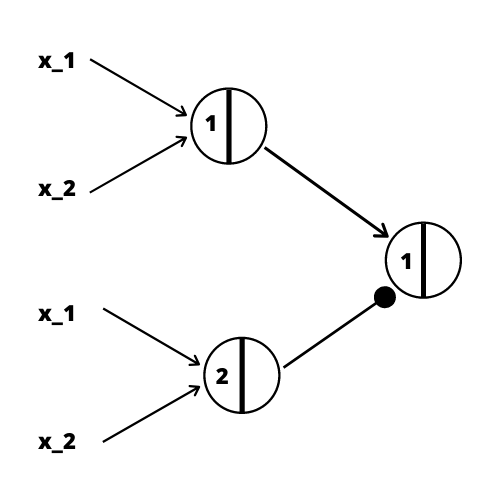

No es difícil ver que este modelo da como resultado $0$ cuando los inputs son iguales, es decir $(1,1)$ y $(0,0)$ y $1$ en otro caso, es decir que simular XOR.